In [6]:
from binance.client import Client
import pandas as pd

In [2]:
api_key = "insert your key here"
secret_key = "insert your key here"

In [3]:
client = Client(api_key = api_key, api_secret = secret_key, tld = "com")

In [4]:
def get_history(symbol, interval, start, end = None):
    bars = client.get_historical_klines(symbol = symbol, interval = interval,
                                        start_str = start, end_str = end, limit = 1000)
    df = pd.DataFrame(bars)
    df["Date"] = pd.to_datetime(df.iloc[:,0], unit = "ms")
    df.columns = ["Open Time", "Open", "High", "Low", "Close", "Volume",
                  "Clos Time", "Quote Asset Volume", "Number of Trades",
                  "Taker Buy Base Asset Volume", "Taker Buy Quote Asset Volume", "Ignore", "Date"]
    df = df[["Date", "Open", "High", "Low", "Close", "Volume"]].copy()
    df.set_index("Date", inplace = True)
    for column in df.columns:
        df[column] = pd.to_numeric(df[column], errors = "coerce")
    
    return df

Earliest available date is 2017-08-17

In [7]:
df = get_history(symbol = "BTCUSDT", interval = "1d", start = "2017-08-17", end = "2021-12-31")
df

,Open,High,Low,Close,Volume
Date,,,,,
2017-08-17,4261.48,4485.39,4200.74,4285.08,795.150377
2017-08-18,4285.08,4371.52,3938.77,4108.37,1199.888264
2017-08-19,4108.37,4184.69,3850.00,4139.98,381.309763
2017-08-20,4120.98,4211.08,4032.62,4086.29,467.083022
2017-08-21,4069.13,4119.62,3911.79,4016.00,691.743060
...,...,...,...,...,...
2021-12-27,50775.48,52088.00,50449.00,50701.44,28779.582120
2021-12-28,50701.44,50704.05,47313.01,47543.74,45853.339240
2021-12-29,47543.74,48139.08,46096.99,46464.66,39498.870000


In [6]:
df.to_csv("bitcoin.csv")

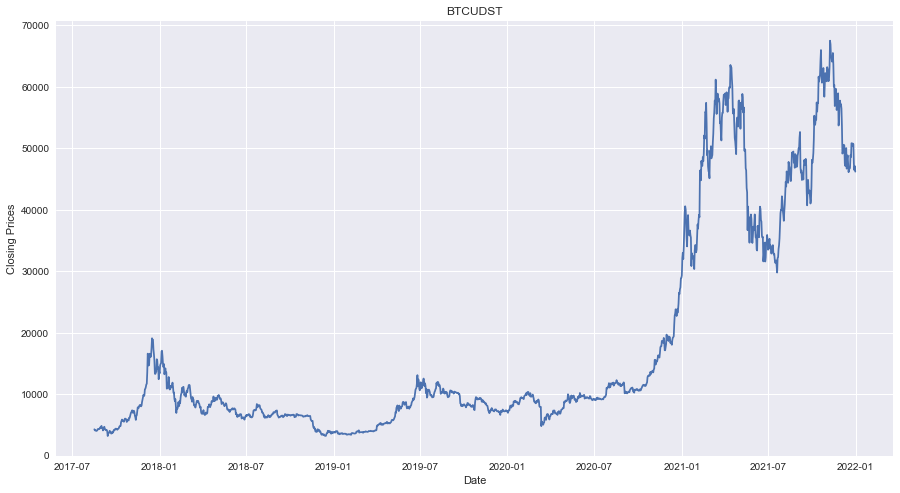

In [13]:
data = pd.read_csv("bitcoin.csv", parse_dates = ["Date"], index_col = "Date")
import matplotlib.pyplot as plt
plt.style.use("seaborn")

plt.figure(figsize=(15,8))
plt.title('BTCUDST')
plt.xlabel('Date')
plt.ylabel('Closing Prices')
plt.plot(data["Close"], label='Closing Prices')
plt.show()